In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv(r'/content/AirPassengers.csv')
data.shape

(144, 2)

In [4]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data-data.set_index(['Month'])
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


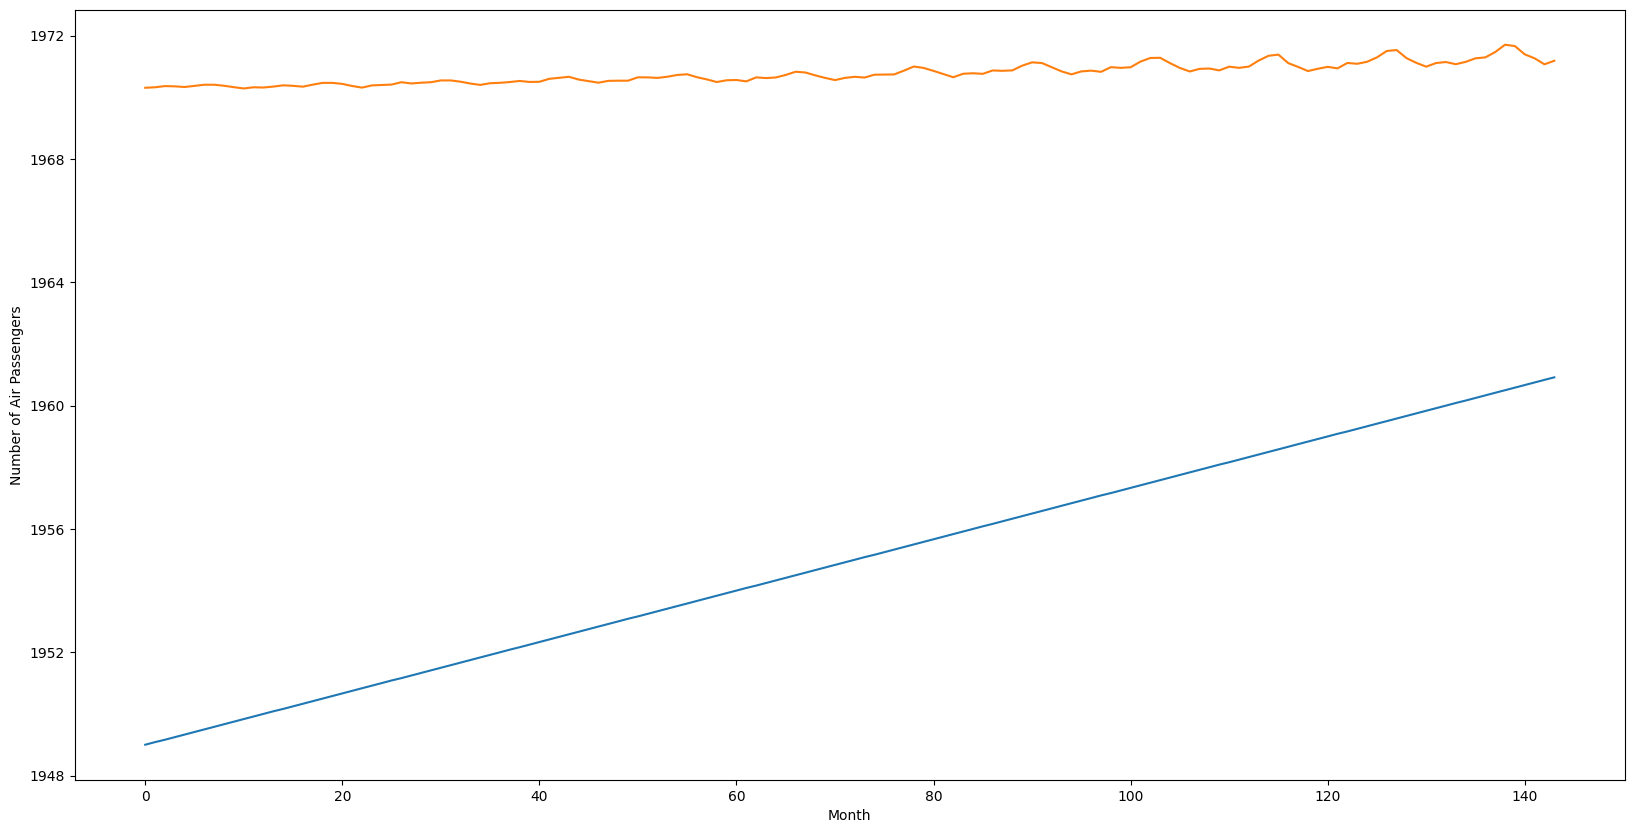

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)


In [8]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

    Passengers
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11  126.666667
12  126.916667
13  127.583333
14  128.333333
    Passengers
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   13.720147
12   13.453342
13   13.166475
14   13.686977


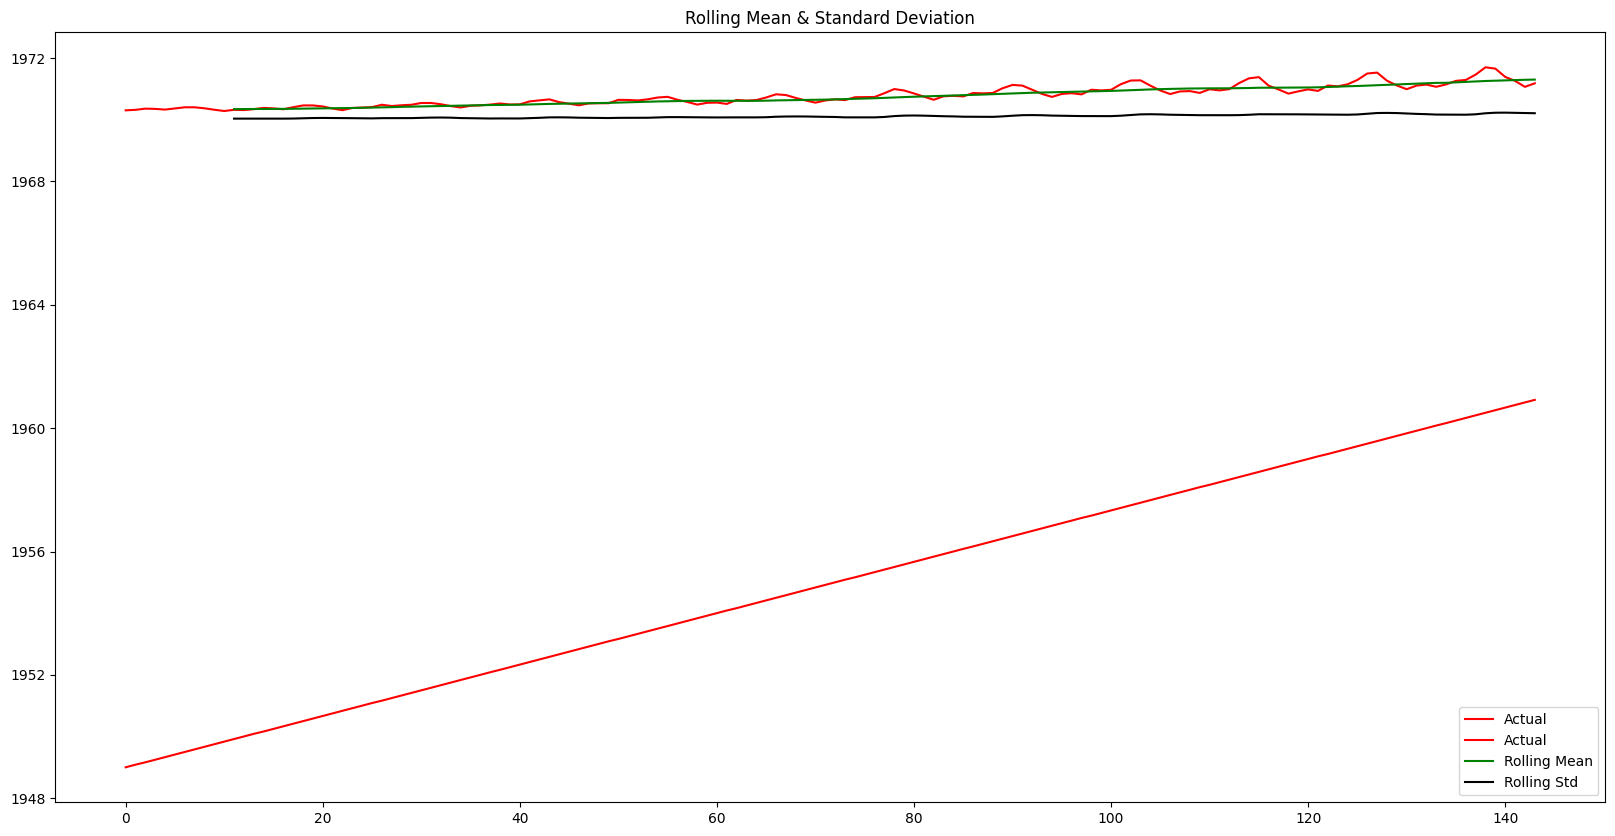

In [11]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean')
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [14]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value', 'Lags Used', 'No of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No of Obs               130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [20]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

TypeError: ignored

<Figure size 2000x1000 with 0 Axes>

In [21]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window-12).mean()
MStd=data_log.rolling(window-12).std()
plt.plot(data_log)
plt.plot(MAvg, color="blue")

NameError: ignored

<Figure size 2000x1000 with 0 Axes>

In [ ]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

In [ ]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

In [ ]:
def stationarity(timeseries):

    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()

    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean')
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [ ]:
stationarity(data_log_diff)

In [ ]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

In [ ]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

In [ ]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

In [ ]:
data_shift=data_shift.dropna()
stationarity(data_shift)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log. label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot (413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle,'--'color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)), linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)), linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)), linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)), linestyle='--',color='green')
plt.title('Autocorrelation Function')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [ ]:
predictions=pd.Series(results.fittedvalues, copy-True)
print(predictions.head())

In [ ]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

In [ ]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

In [ ]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [ ]:
results.forecast (steps=120)